In [1]:
import scanpy as sc

# Load the file
adata = sc.read_h5ad("data/dataset.h5ad")
adata = adata[adata.obs['cell_type'] == "glutamatergic neuron"].copy()

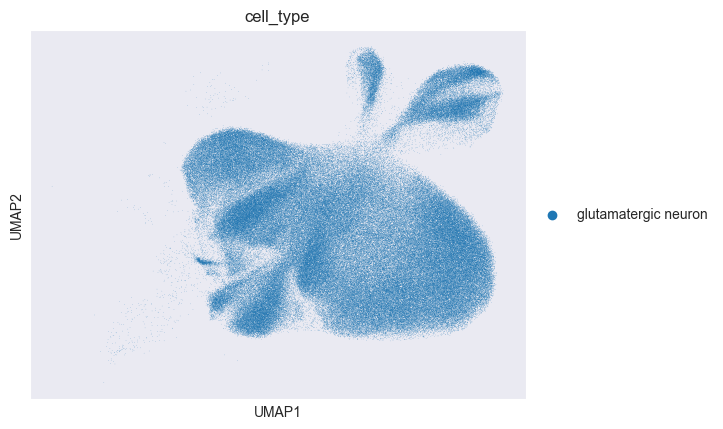

In [4]:
# Plot the cell population based on cell type

sc.pl.umap(adata, color=['cell_type'])

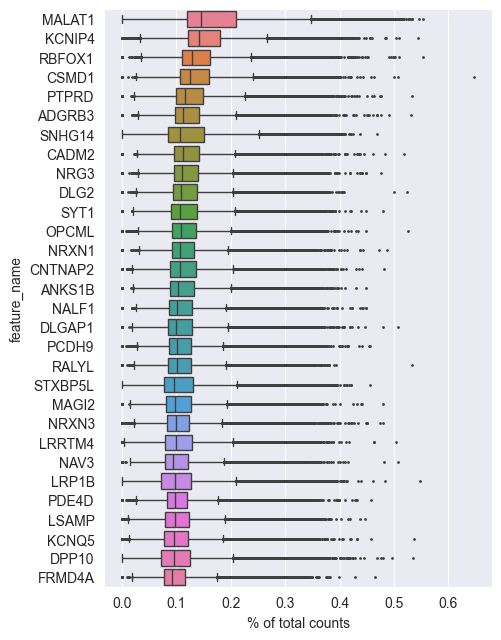

In [12]:
genes = sc.pl.highest_expr_genes(adata, gene_symbols="feature_name")

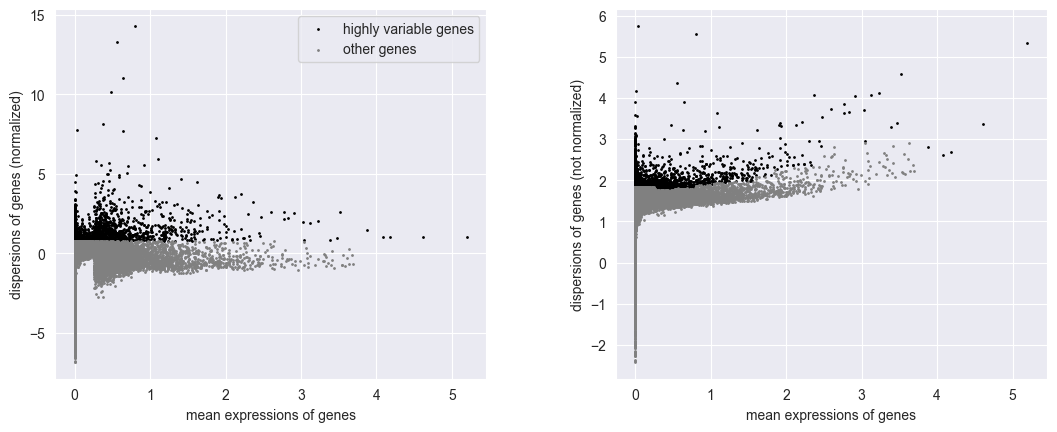

In [17]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
sc.pl.highly_variable_genes(adata)

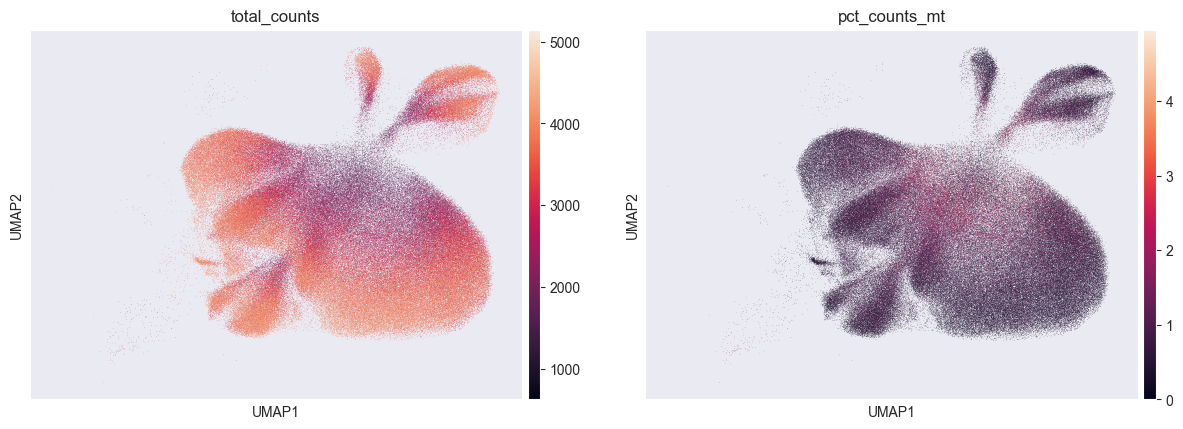

In [26]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt"],
)

In [24]:
adata

AnnData object with n_obs × n_vars = 282930 × 61427
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Author_Annotati

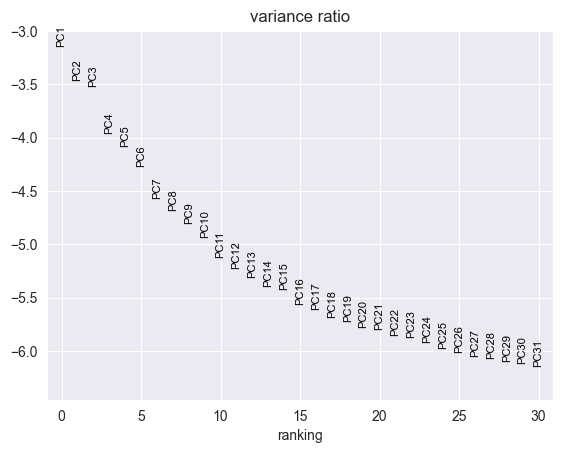

In [32]:
sc.tl.pca(adata, svd_solver='arpack', mask_var = "highly_variable")
sc.pl.pca_variance_ratio(adata, log=True)

In [36]:
adata_hvg = adata[:, adata.var['highly_variable']]

In [39]:
sc.pp.neighbors(adata_hvg, n_pcs=25)
sc.tl.umap(adata)

In [43]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

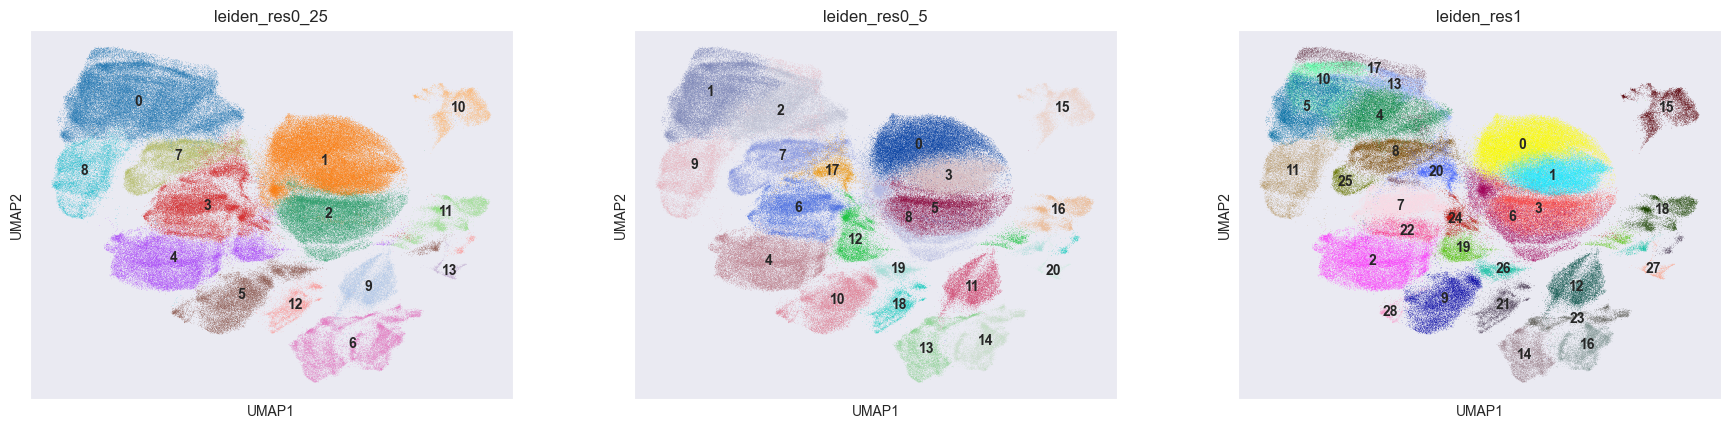

In [45]:
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)